In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from bartpy.bartpy.sklearnmodel import SklearnModel

enter bartpy/bartpy/initializers/sklearntreeinitializer.py SklearnTreeInitializer __init__
-exit bartpy/bartpy/initializers/sklearntreeinitializer.py SklearnTreeInitializer __init__
enter bartpy/bartpy/initializers/sklearntreeinitializer.py SklearnTreeInitializer __init__
-exit bartpy/bartpy/initializers/sklearntreeinitializer.py SklearnTreeInitializer __init__
enter bartpy/bartpy/samplers/scalar.py NormalScalarSampler __init__
-exit bartpy/bartpy/samplers/scalar.py NormalScalarSampler __init__
enter bartpy/bartpy/samplers/scalar.py UniformScalarSampler __init__
-exit bartpy/bartpy/samplers/scalar.py UniformScalarSampler __init__
enter /bartpy/bartpy/samplers/unconstrainedtree/treemutation.py UnconstrainedTreeMutationSampler get_tree_sampler
enter bartpy/bartpy/samplers/unconstrainedtree/proposer.py UniformMutationProposer __init__
enter bartpy/bartpy/samplers/scalar.py DiscreteSampler __init__
-exit bartpy/bartpy/samplers/scalar.py DiscreteSampler __init__
-exit bartpy/bartpy/samplers

Text(0.5, 1.0, 'X v y')

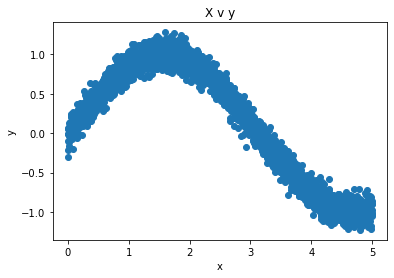

In [2]:
x = np.linspace(0, 5, 3000)
X = pd.DataFrame(x).sample(frac=1.0).values
y = np.random.normal(0, 0.1, size=3000) + np.sin(X[:, 0])
plt.scatter(X[:, 0], y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("X v y")

In [3]:

model = SklearnModel(
    n_samples=3,#1000, 
    n_burn=1,#200, 
    n_trees=2,#100, 
    n_chains=2,#4,
    n_jobs=-1,
    store_in_sample_predictions=False,
    
)

enter bartpy/bartpy/sklearnmodel.py SklearnModel __init__
enter bartpy/bartpy/samplers/leafnode.py LeafNodeSampler __init__
-exit bartpy/bartpy/samplers/leafnode.py LeafNodeSampler __init__
enter bartpy/bartpy/samplers/schedule.py SampleSchedule __init__
-exit bartpy/bartpy/samplers/schedule.py SampleSchedule __init__
enter bartpy/bartpy/samplers/modelsampler.py ModelSampler __init__
-exit bartpy/bartpy/samplers/modelsampler.py ModelSampler __init__
-exit bartpy/bartpy/sklearnmodel.py SklearnModel __init__


In [4]:
model.fit(X, y)

enter bartpy/bartpy/sklearnmodel.py SklearnModel fit
enter bartpy/bartpy/sklearnmodel.py SklearnModel _construct_model
enter bartpy/bartpy/sklearnmodel.py SklearnModel _convert_covariates_to_data
enter bartpy/bartpy/data.py Data __init__
enter bartpy/bartpy/data.py Data mask
-exit bartpy/bartpy/data.py Data mask
enter bartpy/bartpy/data.py CovariateMatrix __init__
-exit bartpy/bartpy/data.py CovariateMatrix __init__
enter bartpy/bartpy/data.py Target __init__
enter bartpy/bartpy/data.py Target normalize_y
-exit bartpy/bartpy/data.py Target normalize_y
-exit bartpy/bartpy/data.py Target __init__
enter bartpy/bartpy/data.py TreatmentAssignment __init__
-exit bartpy/bartpy/data.py TreatmentAssignment __init__
enter bartpy/bartpy/data.py PropensityScore __init__
-exit bartpy/bartpy/data.py PropensityScore __init__
-exit bartpy/bartpy/data.py Data __init__
-exit bartpy/bartpy/sklearnmodel.py SklearnModel _convert_covariates_to_data
enter bartpy/bartpy/data.py Data y
-exit bartpy/bartpy/data

SklearnModel(n_burn=1, n_chains=2, n_samples=3, n_trees=2)

In [5]:
pred = model.predict(X)
score = model.score(X, y)

enter bartpy/bartpy/sklearnmodel.py SklearnModel predict
enter bartpy/bartpy/sklearnmodel.py SklearnModel _out_of_sample_predict
enter bartpy/bartpy/data.py Data y
-exit bartpy/bartpy/data.py Data y
enter bartpy/bartpy/model.py Model predict
CALLING PREDICT FROM THE WRONG CLASS!!!!!! THIS IS THE Model CLASS.....
enter bartpy/bartpy/model.py Model _out_of_sample_predict
enter bartpy/bartpy/model.py Model trees
-exit bartpy/bartpy/model.py Model trees
enter bartpy/bartpy/tree.py Tree
enter bartpy/bartpy/tree.py Tree _out_of_sample_predict
enter bartpy/bartpy/tree.py Tree leaf_nodes
-exit bartpy/bartpy/tree.py Tree leaf_nodes
enter bartpy/bartpy/node.py LeafNode predict
-exit bartpy/bartpy/node.py LeafNode predict
enter bartpy/bartpy/node.py LeafNode current_value
-exit bartpy/bartpy/node.py LeafNode current_value
enter bartpy/bartpy/node.py TreeNode split
-exit bartpy/bartpy/node.py TreeNode split
enter bartpy/bartpy/splitcondition.py CombinedCondition condition
-exit bartpy/bartpy/split

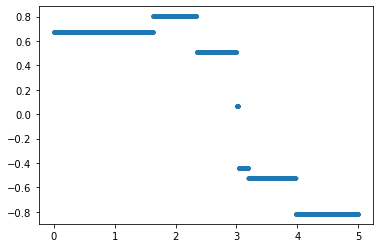

In [6]:
plt.plot(X, pred, '.')

In [2]:
from copy import deepcopy
from typing import List, Callable, Mapping, Union, Optional

import numpy as np
import pandas as pd
import logging
from joblib import Parallel, delayed
from sklearn.base import RegressorMixin, BaseEstimator

from bartpy.bartpy.data import Data
from bartpy.bartpy.initializers.initializer import Initializer
from bartpy.bartpy.initializers.sklearntreeinitializer import SklearnTreeInitializer
from bartpy.bartpy.model import Model
#from bartpy.bartpy.samplers.leafnode import LeafNodeSampler
#from bartpy.bartpy.samplers.modelsampler import ModelSampler, Chain
#from bartpy.bartpy.samplers.schedule import SampleSchedule
#from bartpy.bartpy.samplers.sigma import SigmaSampler
#from bartpy.bartpy.samplers.treemutation import TreeMutationSampler
#from bartpy.bartpy.samplers.unconstrainedtree.treemutation import get_tree_sampler
#from bartpy.bartpy.sigma import Sigma

enter bartpy/bartpy/initializers/sklearntreeinitializer.py SklearnTreeInitializer __init__
-exit bartpy/bartpy/initializers/sklearntreeinitializer.py SklearnTreeInitializer __init__


In [1]:
from copy import deepcopy, copy
from typing import List, Generator, Optional

import numpy as np
import pandas as pd

from bartpy.bartpy.data import Data
from bartpy.bartpy.initializers.initializer import Initializer
from bartpy.bartpy.initializers.sklearntreeinitializer import SklearnTreeInitializer
from bartpy.bartpy.sigma import Sigma
from bartpy.bartpy.split import Split
from bartpy.bartpy.tree import Tree, LeafNode, deep_copy_tree

In [1]:
from bartpy.bartpy.model import Model


enter bartpy/bartpy/initializers/sklearntreeinitializer.py SklearnTreeInitializer __init__
-exit bartpy/bartpy/initializers/sklearntreeinitializer.py SklearnTreeInitializer __init__
